### Part 1

In [29]:
import math

In [30]:
MI_1 = (
    140 / 15250 * math.log2((15250 * 140) / (150 * 1240))
    + 1100 / 15250 * math.log2((15250 * 1100) / (15100 * 1240))
    + 10 / 15250 * math.log2((15250 * 10) / (150 * 14010))
    + 14000 / 15250 * math.log2((15250 * 14000) / (15100 * 14010))
)
MI_1

0.030548829000113648

In [31]:
MI_2 = (
    150 / 18170 * math.log2((18170 * 150) / (170 * 12150))
    + 12000 / 18170 * math.log2((18170 * 12000) / (12150 * 18000))
    + 20 / 18170 * math.log2((18170 * 20) / (170 * 6020))
    + 6000 / 18170 * math.log2((18170 * 6000) / (18000 * 6020))
)
MI_2

0.001671332058156083

### Part 2

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
np.random.seed(6740)
f0_points = np.random.normal(size=100)
f0_points[:10]

array([ 0.66393229, -0.44686525,  0.307401  ,  0.63585065,  1.42587019,
        0.26122745,  0.27132984,  1.48350301, -0.88477892, -0.85685048])

In [34]:
np.random.seed(6740)
f1_points = np.random.normal(scale=np.sqrt(1.25), size=50)
f1_points[:10]

array([ 0.74229886, -0.49961054,  0.34368477,  0.71090264,  1.59417134,
        0.29206117,  0.30335598,  1.65860679, -0.98921291, -0.95798796])

In [35]:
samples = np.concatenate([f0_points, f1_points])
h = 2  # Set change detection threshold

change_detection = 0
detected = False
CUSUM_stat = np.zeros(151)
for indx, i in enumerate(samples):
    CUSUM_stat[indx + 1] = np.max(
        CUSUM_stat[indx] + 1 / 2 * np.log(1.25) - i**2 / 10, 0
    )
    if CUSUM_stat[indx + 1] > h and detected is False:
        detected = True
        change_detection = indx + 1

change_detection

112

Text(0, 0.5, 'CUSUM Statistics')

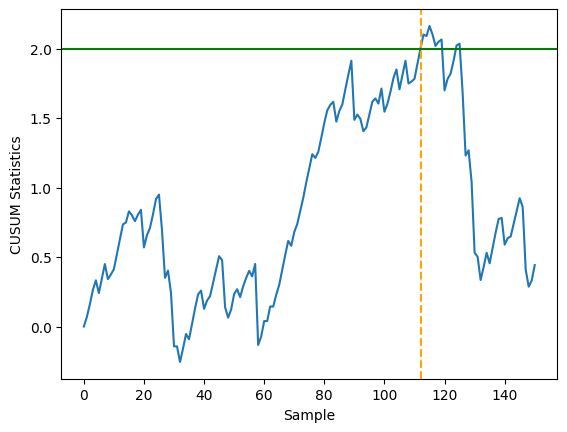

In [36]:
plt.plot(CUSUM_stat)
plt.axvline(change_detection, color="orange", linestyle="--", label="Detected Change")
plt.axhline(y=h, color="g", label="CUSUM Threshold")
plt.xlabel("Sample")
plt.ylabel("CUSUM Statistics")